# 电信用户流失分析、预测及用户管理

贺睿睿

## 1. 研究背景

近年来，不论是传统行业还是互联网行业，都面临着用户流失问题。研究表明，企业可以在一周内失去100个用户，而同时又得到另外的用户，从表面上来看业绩没有受到任何影响，而实际上争取这些新用户所花费的宣传、促销等成本显然要比保持老用户昂贵的多，从企业投资回报程度的角度来看是非常不经济的。

随着运营商的竞争不断加剧，电信运营商亟需提高用户留存率、增加用户黏性，减少客户流失。因此，维护好现有的客户，降低用户流失率对每个产品都至关重要。为了更好降低用户流失率，需要了解用户流失的特征，分析用户流失原因，制定有效方案。

## 2. 研究设计

### 2.1 研究目的

为了更好的降低用户流失率，需要了解易流失用户的特征，分析原因，制定相关应对方案。另外需要进行用户细分，对不同特征人群制定个性化方案。

本研究将建立模型，探究影响用户流失的因素，预测用户流失，根据模型进行用户细分。

### 2.2 数据来源

数据来自kaggle电信用户流失(https://www.kaggle.com/datasets/blastchar/telco-customer-churn)。共有7043个用户数据，每个用户有21个特征，包括：编号，注册服务，用户信息，是否流失等。

## 3. 数据预处理

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import neighbors
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

warnings.filterwarnings("ignore")
#显示中文
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#读入数据
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# 处理TotalCharges，含空值
data['TotalCharges'].replace(' ', np.nan, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype('float')

#替换No phone service为No
replace_list=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in replace_list:
    data[i]=data[i].str.replace('No internet service','No')
data['MultipleLines']=data['MultipleLines'].str.replace('No phone service','No')

#替换0，1为No，Yes
data.SeniorCitizen=data.SeniorCitizen.replace({0:'No',1:'Yes'})

In [4]:
#删除空值
data.dropna(inplace=True)
#查看重复值
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## 4. 可视化分析

In [6]:
df_Churn=data[data['Churn']=='Yes']#流失客户
Rate_Churn=data[data['Churn']=='Yes'].shape[0]/data['Churn'].shape[0]
#总流失率
Rate_Churn

0.26578498293515357

#### 用户属性与用户流失率

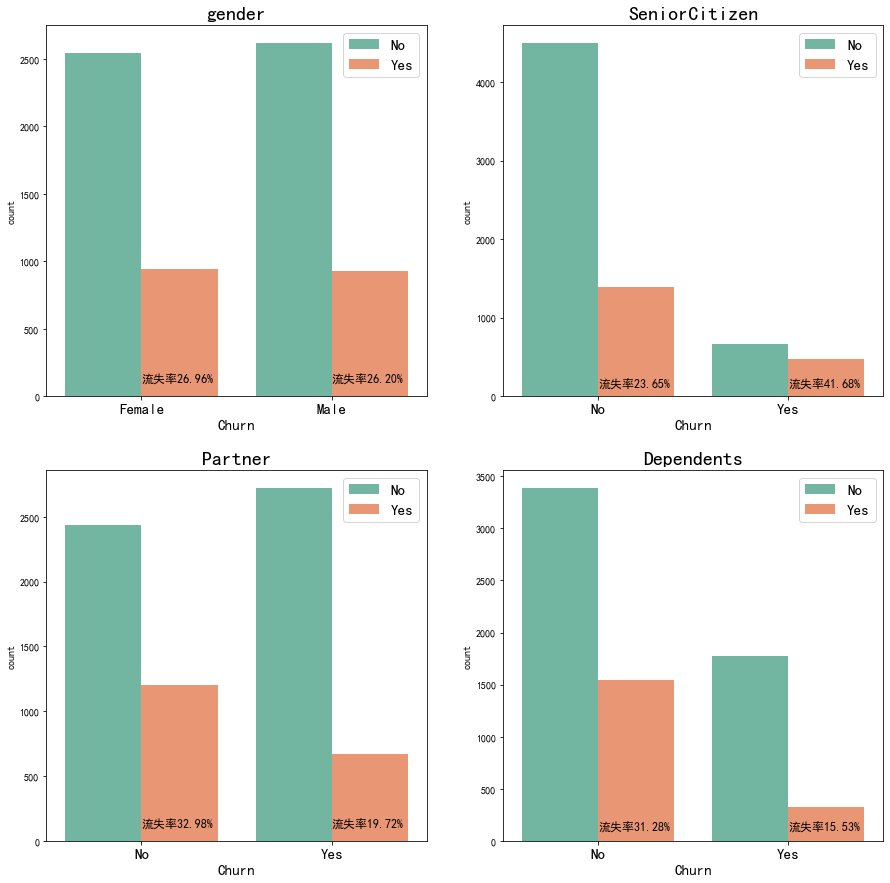

In [7]:
fig,axes=plt.subplots(2,2,figsize=(15,15))
for i ,j in enumerate(['gender','SeniorCitizen','Partner','Dependents']):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(x=j,hue='Churn',data=data,palette="Set2",order=df_Churn.groupby(j)['Churn'].value_counts().index.levels[0])
    plt.title(str(j), fontsize=20)
    plt.xlabel('Churn',fontsize=15)
    plt.xticks(fontsize=15)
    plt.legend(fontsize=15)
    lent=df_Churn.groupby(j)['Churn'].value_counts().shape[0]
    for p in range(lent):
        Rate=df_Churn.groupby(j)['Churn'].value_counts()[p]/data.groupby(j,as_index=False)['Churn'].size().loc[p,'size']   
        plt.text(p,100,'流失率{:.2%}'.format(Rate),fontsize=12)
    i+=1

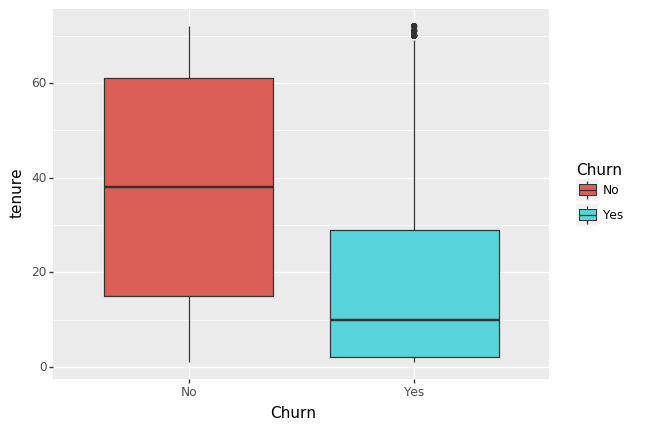

<ggplot: (-9223371924969567808)>

In [8]:
(ggplot(data, aes(x = 'Churn', y = 'tenure',  fill = 'Churn')) + geom_boxplot())

- 是否经济独立、是否有伴侣、是否老年用户和入网时间这四个属性对用户流失率有很大影响;性别对用户流失没有显著影响。

- 经济不独立、没有伴侣的老年用户容易流失。

- 流失客户的入网时间较短，平均为10个月，且呈右偏分布；入网时间越长，客户流失率越低。

#### 服务属性与用户流失率

In [9]:
data_ser = data.loc[:,('PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','Churn')]
data_ser = pd.melt(data_ser, id_vars =['Churn'])
data_ser.Churn = data_ser.Churn.replace({'No':0,'Yes':1})
data_ser = data_ser.groupby(['variable','value'],as_index=False).agg([np.sum, np.size]).reset_index()

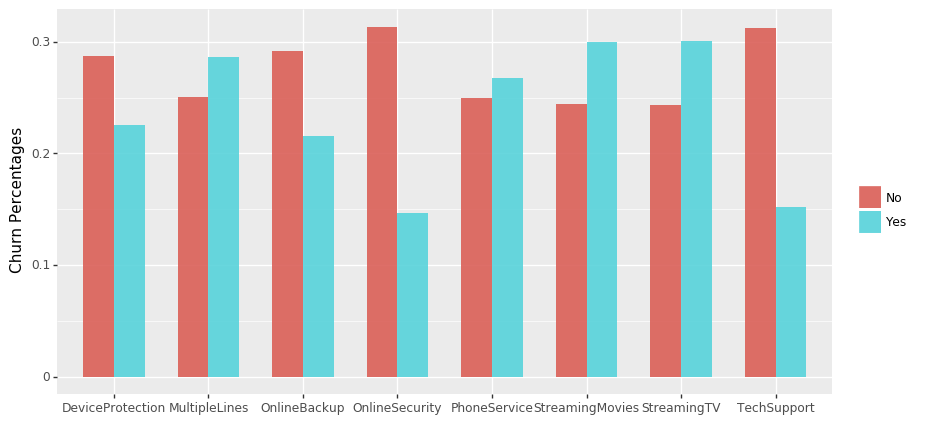

<ggplot: (-9223371924969746648)>

In [10]:
(ggplot(data_ser, aes(x = 'variable', y = data_ser['Churn']['sum']/data_ser['Churn']['size'] ,fill = 'value'))
+ geom_col(stat='identity',position="dodge", width = 0.65, alpha = 0.9)
+ theme(dpi = 100,figure_size = (10,5), legend_title = element_text(color='white'))
+ xlab(' ')
+ ylab('Churn Percentages')
)

- 手机服务中，订购PhoneService的用户群流失率基本上与整体流失率持平，订购MultipleLines的流失率比整体流失率高；
- 网络服务中

    1.其中技术性服务（OnlineSecurity、OnlineBackup、DeviceProtection、TechSupport）中订购的用户流失率均比整体流失率低，而未订购的则高出整体流失率不少。

    2.其中在娱乐性服务（StreamingTV、StreamingMovies）上，订购的流失率都比整体流失率高。

#### 合同属性与用户流失率

In [11]:
data_con = data.loc[:,('Contract','Churn')]
data_con = data_con.groupby(['Contract','Churn']).size().reset_index()
data_con.columns = ['Contract','Churn','size']
data_con.Churn = data_con.Churn.replace({0:'No', 1:'Yes'})

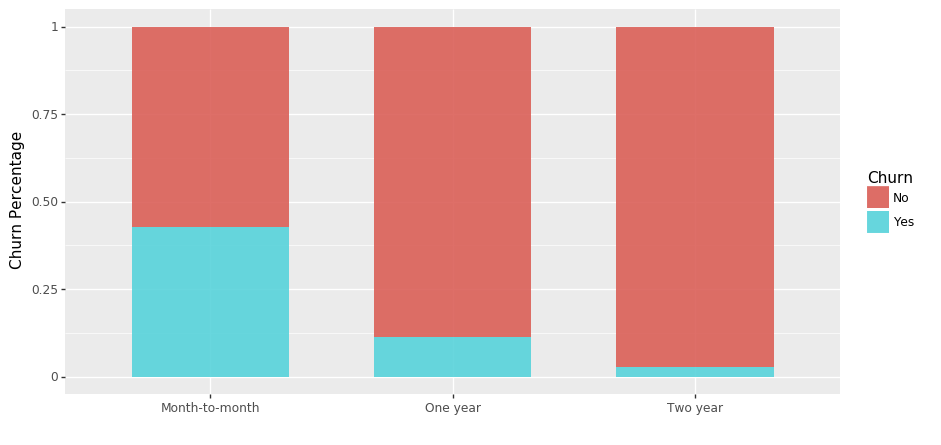

<ggplot: (-9223371924969567836)>

In [12]:
(ggplot(data_con, aes(x = 'Contract', y = data_con['size'], fill = 'Churn'))
+ geom_bar(stat='identity',position = 'fill',width = 0.65, alpha = 0.9)
+ theme(dpi = 100,figure_size = (10,5), legend_title = element_text())
+ xlab(' ')
+ ylab('Churn Percentage')
)

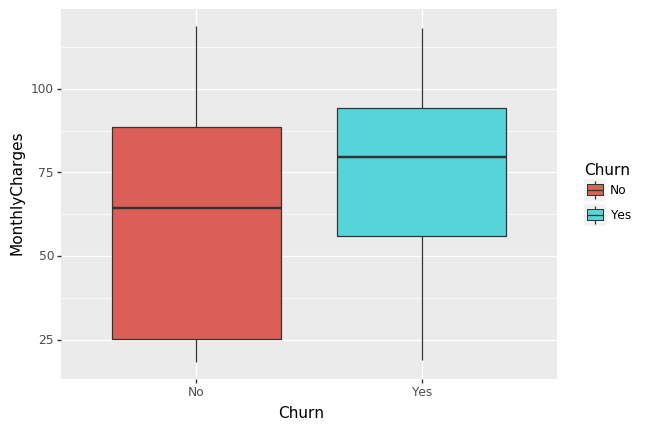

<ggplot: (-9223371924969464708)>

In [13]:
(ggplot(data, aes(x = 'Churn', y = 'MonthlyCharges',  fill = 'Churn')) + geom_boxplot())

在合同方面
- 按月签约的客户流失率最高，并且签约时间越长，客户流失率越低，即按月签约的客户对产品的粘性不高。
- 流失用户的主要来源是月消费80-100元的用户。

## 5. 建模分析

In [14]:
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])

In [15]:
X = data.drop(['customerID','Churn'], axis = 1)
Y = data.Churn.replace({'No':0,'Yes':1})
#one-hot 编码
X = pd.get_dummies(X)

#划分训练集测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

### 5.1 Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
try:
    reg = LogisticRegression(solver='liblinear')
    reg.fit(X_train, Y_train)
except Exception:
    print('Logistic建模异常')

### 5.2 LDA

In [18]:
try:
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,Y_train)
except Exception:
    print('LDA建模异常')

### 5.3 KNN

In [19]:
try:
    knn_10 = neighbors.KNeighborsClassifier(n_neighbors = 10, p=2) #p=2表示使用欧式距离来挑选最近邻居
    knn_10.fit(X_train, Y_train)
except Exception:
    print('KNN建模异常')

knn_15 = neighbors.KNeighborsClassifier(n_neighbors = 15, p=2) #p=2表示使用欧式距离来挑选最近邻居
knn_15.fit(X_train, Y_train)

knn_20 = neighbors.KNeighborsClassifier(n_neighbors = 20, p=2) #p=2表示使用欧式距离来挑选最近邻居
knn_20.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

### 5.4 模型评估与选择

In [20]:
#定义类用来进行模型评估
class Model:
    def __init__(self, model):
        self.__model = model

    def prediction(self, X):
        return self.__model.predict(X)
    
    def prediction_p(self, X):
        return self.__model.predict_proba(X)

    def roc(self, X_test, Y_test, n = 2):
        auc = round(roc_auc_score(Y_test, self.prediction(X_test)), n)
        fpr, tpr, thresholds = roc_curve(Y_test, self.prediction_p(X_test)[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

    def score(self, X_test, Y_test,n = 2):
        prediction = self.prediction(X_test)
        #预测准确率
        accuracy = round(accuracy_score(Y_test,prediction), n)
        #查准率
        precision = round(precision_score(Y_test,prediction), n)
        #召回率
        recall = round(recall_score(Y_test, prediction), n)
        #f1
        f1 = round(f1_score(Y_test,prediction), n)
        #auc值
        auc = round(roc_auc_score(Y_test, self.prediction(X_test)), n)

        print("该模型在测试集上的准确率（accuracy）：", accuracy)
        print("该模型在测试集上的查准率（precision）：", precision)
        print("该模型在测试集上的召回率（recall）：", recall)
        print("该模型在测试集上的f1 score：", f1)
        print("该模型在测试集上的AUC：", auc)


In [21]:
#创建Model类的对象
model_logistic = Model(reg)
model_lda = Model(lda)
model_knn10 = Model(knn_10)
model_knn15 = Model(knn_15)
model_knn20 = Model(knn_20)

In [22]:
#逻辑回归
model_logistic.score(X_test, Y_test)

该模型在测试集上的准确率（accuracy）： 0.81
该模型在测试集上的查准率（precision）： 0.73
该模型在测试集上的召回率（recall）： 0.54
该模型在测试集上的f1 score： 0.62
该模型在测试集上的AUC： 0.73


In [23]:
#线性判别分析
model_lda.score(X_test, Y_test)

该模型在测试集上的准确率（accuracy）： 0.8
该模型在测试集上的查准率（precision）： 0.71
该模型在测试集上的召回率（recall）： 0.54
该模型在测试集上的f1 score： 0.62
该模型在测试集上的AUC： 0.72


In [24]:
#knn
model_knn10.score(X_test, Y_test)

该模型在测试集上的准确率（accuracy）： 0.76
该模型在测试集上的查准率（precision）： 0.67
该模型在测试集上的召回率（recall）： 0.36
该模型在测试集上的f1 score： 0.47
该模型在测试集上的AUC： 0.64


In [25]:
model_knn15.score(X_test, Y_test)

该模型在测试集上的准确率（accuracy）： 0.76
该模型在测试集上的查准率（precision）： 0.67
该模型在测试集上的召回率（recall）： 0.38
该模型在测试集上的f1 score： 0.49
该模型在测试集上的AUC： 0.65


In [26]:
model_knn20.score(X_test, Y_test)

该模型在测试集上的准确率（accuracy）： 0.76
该模型在测试集上的查准率（precision）： 0.68
该模型在测试集上的召回率（recall）： 0.34
该模型在测试集上的f1 score： 0.45
该模型在测试集上的AUC： 0.63


综上，logistic回归模型在各方面表现都更加优秀，后续的分析将选择logistic回归模型

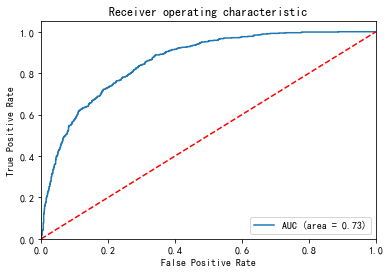

In [27]:
model_logistic.roc(X_test, Y_test)

## 6. 用户划分

根据logistic模型的预测结果，按照流失风险从高到低将现有用户平均分为5个人群，分别为高流失风险，偏高，中等，偏低，低流失风险。通过用户细分，公司可以针对这个高流失风险用户提供针对性服务，也可以对高流失风险用户进行用户调研，详细了解用户对于产品的意见。

In [28]:
#现有用户的流失概率
pred_p = reg.predict_proba(X)[:,-1]
index1 = np.argsort(-pred_p)[1:1406]
index2 = np.argsort(-pred_p)[1407:2813]
index3 = np.argsort(-pred_p)[2814:4220]
index4 = np.argsort(-pred_p)[4221:5627]
index5 = np.argsort(-pred_p)[5628:7032]

In [29]:
Y_array = np.array(Y)
p1 = sum(Y_array[index1])/len(index1)
p2 = sum(Y_array[index2])/len(index2)
p3 = sum(Y_array[index3])/len(index3)
p4 = sum(Y_array[index4])/len(index4)
p5 = sum(Y_array[index5])/len(index5)
ave  =  sum(Y_array)/len(Y_array)

Text(2.5, 0.32, '平均流失率26.6%')

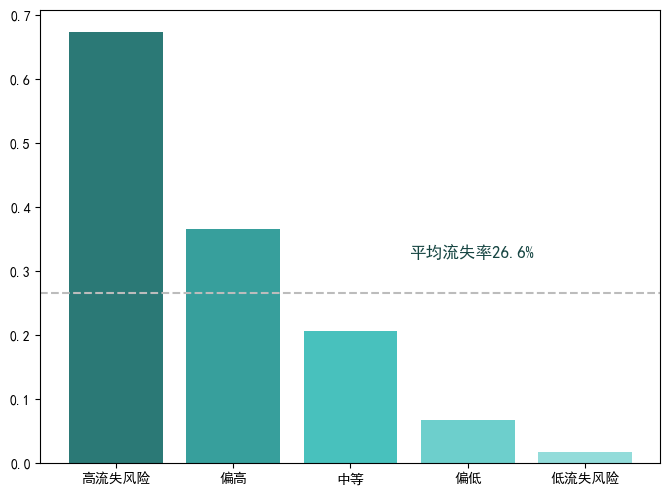

In [30]:
label = ("高流失风险","偏高","中等","偏低","低流失风险")
p = [p1,p2,p3,p4,p5]
plt.figure(dpi=100, figsize=(8,6))
plt.bar(label, p, color = ("#2B7976","#379F9C","#48C1BD","#6DCFCC","#93DCDA"))
plt.axhline(ave, 0, 3,color = "#BCBCBC",ls = '--')
plt.text(2.5,0.32,'平均流失率{:.1%}'.format(ave),fontsize=12,color = "#174643")

## 7. 结论与建议

1.	针对老年用户、无亲属、无伴侣用户，制定专属的个性化服务，如推出温暖套餐等，提升用户的满意度。

2.	针对新注册客户，降低前10个月的月租费，以此渡过用户的流失高峰期。

3.	推出套餐，绑定技术性服务（OnlineSecurity、OnlineBackup、DeviceProtection、TechSupport）。

4.	重点改善Fiber optic互联网服务，网络电视、电影服务。

5.	针对签订Month-to-month合同的用户，可以推出一次性充值满减活动，促使用户签订长时间的合同。
